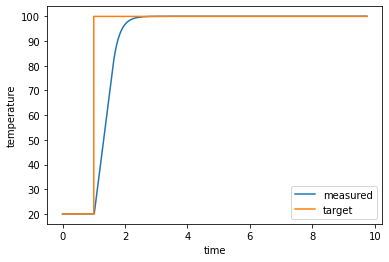

In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
from simple_pid import PID


class WaterBoiler:
    """
    Simple simulation of a water boiler which can heat up water
    and where the heat dissipates slowly over time
    """

    def __init__(self):
        self.water_temp = 20

    def update(self, boiler_power, dt):
        if boiler_power > 0:
            # Boiler can only produce heat, not cold
            self.water_temp += 1 * boiler_power * dt

        # Some heat dissipation
        self.water_temp -= 0.02 * dt
        return self.water_temp


if __name__ == '__main__':
    boiler = WaterBoiler()
    water_temp = boiler.water_temp

    pid = PID(5, 0.01, 0.1, setpoint=water_temp)
    pid.output_limits = (0, 100)

    start_time = time.time()
    last_time = start_time

    # Keep track of values for plotting
    setpoint, y, x = [], [], []

    while time.time() - start_time < 10:
        current_time = time.time()
        dt = current_time - last_time

        power = pid(water_temp)
        water_temp = boiler.update(power, dt)

        x += [current_time - start_time]
        y += [water_temp]
        setpoint += [pid.setpoint]

        if current_time - start_time > 1:
            pid.setpoint = 100

        last_time = current_time

    plt.plot(x, y, label='measured')
    plt.plot(x, setpoint, label='target')
    plt.xlabel('time')
    plt.ylabel('temperature')
    plt.legend()
    if os.getenv('NO_DISPLAY'):
        # If run in CI the plot is saved to file instead of shown to the user
        plt.savefig(f"result-py{'.'.join([str(x) for x in sys.version_info[:2]])}.png")
    else:
        plt.show()[;]